In [136]:
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np # Linear algebra
import pandas as pd # DataFrame
import pickle 

# Sklearn
from sklearn.tree import DecisionTreeClassifier # Import decision tree classifier
from sklearn.model_selection import train_test_split # Divide the dataset
from sklearn import metrics # Evaluate the model

# Tensorflow
import tensorflow as tf

# Images (CNN)
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Define kernels
from tensorflow.keras.models import load_model # Loading the models

# Text (RNN)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

<div align = "justify">

# **Exercise 1: Machine Learning**
**Dataset:** Iris (flower classification).

**Task:**
* Load the dataset and split it into training/testing (80/20).
+ Train a decision tree with a maximum depth of 3.
* Evaluate the accuracy on the test set and display the confusion matrix.
* Explain how you could avoid overfitting in this model.

</div>

El dataset fue obtenido de la página web de Kaggle: \
[Iris Species Kaggle](https://www.kaggle.com/datasets/uciml/iris) <br>

In [137]:
df_iris = pd.read_csv(r'\Users\diego\OneDrive\Documentos\Materias UDLAP\Python\Artificial_intelligence\Third_partial_ML_CNN_RNN\Iris.csv')
df_iris = df_iris.drop(columns="Id")
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Figure size 400x400 with 0 Axes>

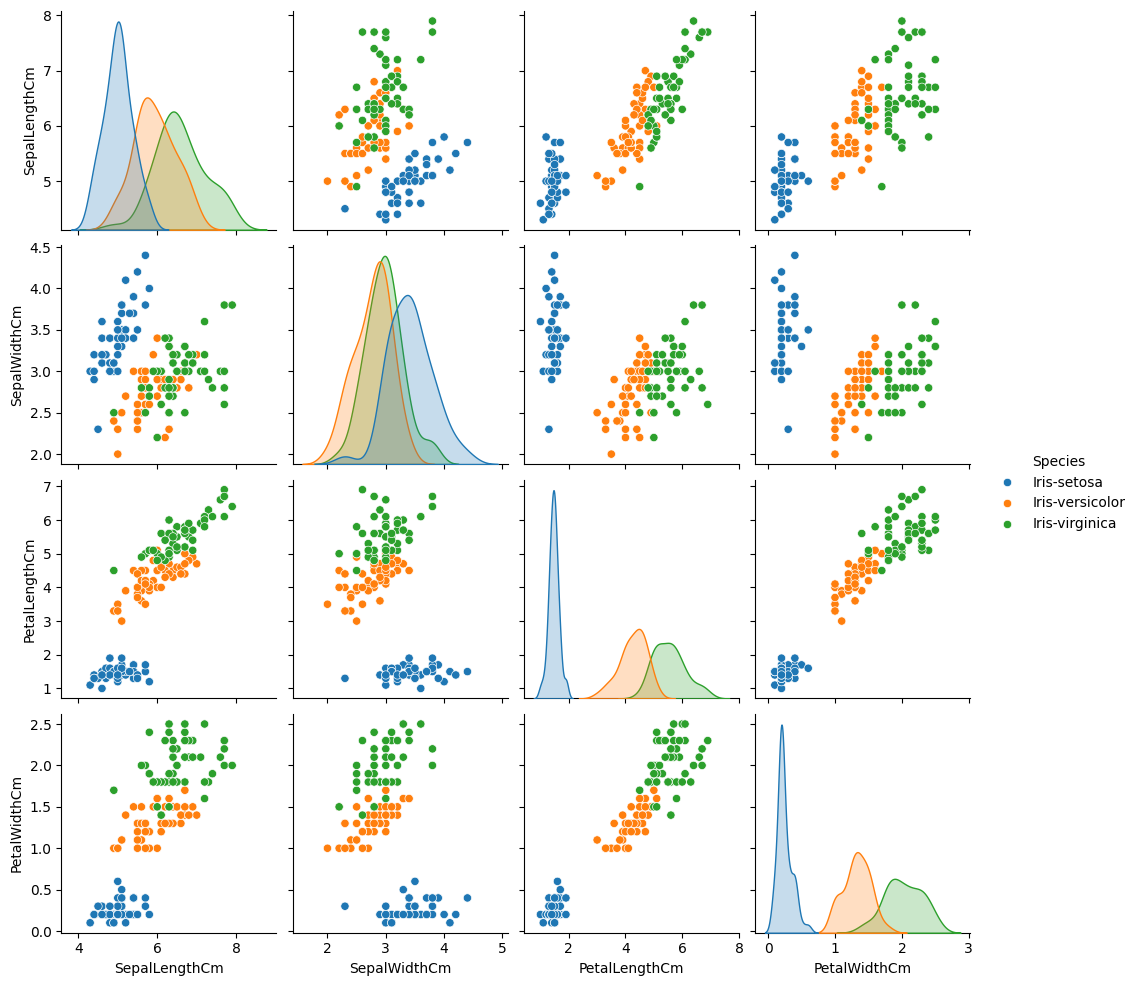

In [138]:
# Plot every variable against every other variable
plt.figure(figsize=(4,4))
sns.pairplot(df_iris, hue="Species")
plt.show()

In [139]:
x_features = df_iris.iloc[:,:-1]
y_labels = df_iris.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, train_size=0.2, random_state=21)

In [140]:
# Train the model 
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3) # Create an object from the class
decision_tree = decision_tree.fit(x_train, y_train) # Train the model 
y_predicted = decision_tree.predict(x_test) # Predct labels

In [141]:
# Compute some metrics of the performance of the model
print("Accuracy:", round(metrics.accuracy_score(y_test, y_predicted), 4), "\n")
print("CLASSIFICATION REPORT\n") # Display the report
print(metrics.classification_report(y_true=y_test, y_pred=y_predicted))


Accuracy: 0.9333 

CLASSIFICATION REPORT

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.86      0.95      0.90        40
 Iris-virginica       0.94      0.84      0.89        37

       accuracy                           0.93       120
      macro avg       0.93      0.93      0.93       120
   weighted avg       0.94      0.93      0.93       120



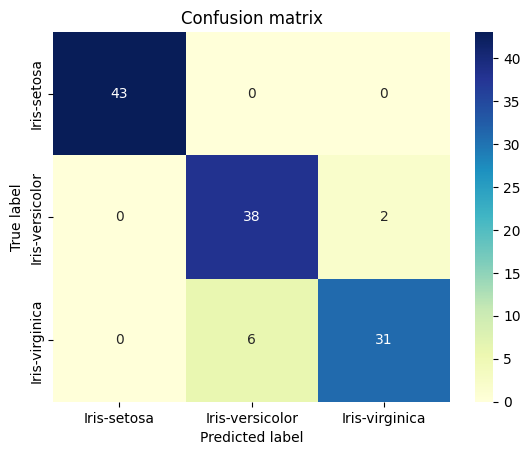

In [142]:
# confussion_matrix automatically sorts the labels
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_predicted)
class_names = sorted(y_test.unique()) # Sort alphabetical values

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()
#sns.heatmap(conf_matrix)

<div align = "justify">

**Bonus**

To avoid overfitting, it might be useful to incorporate an unsupervised learning technique such as K-Means clustering. This method can help by grouping similar data points together, which can provide more information to the model, enabling it to make better, more accurate predictions. Additionally, applying DBSCAN could be another good approach, as it helps identify outliers that may be contributing noise to the model, ensuring the training process is more robust. When using K-Means, it’s crucial to choose the right number of clusters using techniques like the *Elbow Method* or *Silhouette Score* in order to avoid having too many clusters, which could lead to overfitting. Also, standardizing the data using StandardScaler function of Sklearn ensures that each feature contributes equally to the distance metric used by K-Means. Finally, cross-validation is important to verify that the model generalizes well and does not just fit to noise in the data.



</div>

<div align = "justify">

# **Exercise 2: CNN**
**Dataset:** CIFAR-10 (images)

**Task:**
* Preprocess the images (normalization, reshape).
* Design a CNN with at least:
    - 1 convolutional layer (32 filters, kernel 3x3).
    - 1 max pooling layer.
    - 1 dense layer with dropout (20%).
* Train the model and report the accuracy in testing.
* Bonus: Visualize the filters of the first convolutional layer

</div>

In [156]:
# Load and preprocess CIFAR-10 datset that is already incorporated in Tensorflow
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize test images only (the training data will be handled by ImageDataGenerator)
test_images = test_images.astype('float32') / 255.0

# Classes' names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Apply data augmentation for training
train_data_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Create train and validation augmented images
batch_size = 64
train_aug_images = train_data_aug.flow(train_images, train_labels, 
                                batch_size=batch_size, subset='training')

# Create validation augmented images set
val_aug_images = train_data_aug.flow(train_images, train_labels, 
                              batch_size=batch_size, subset='validation')

### Define the CNN model

In [157]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='conv1'),
    layers.Conv2D(64, (3, 3), activation='relu'),  # Additional convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2), 
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary() # Show table

c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,922 (3.14 MB)

 Trainable params: 822,922 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(train_aug_images,
                    epochs=15,
                    validation_data=val_aug_images)

Epoch 1/15


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.2920 - loss: 1.9175 - val_accuracy: 0.4391 - val_loss: 1.5473
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.4196 - loss: 1.5920 - val_accuracy: 0.4858 - val_loss: 1.4264
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.4667 - loss: 1.4788 - val_accuracy: 0.4929 - val_loss: 1.3920
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.4891 - loss: 1.4149 - val_accuracy: 0.5377 - val_loss: 1.2886
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.5122 - loss: 1.3620 - val_accuracy: 0.5443 - val_loss: 1.2656
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.5152 - loss: 1.3380 - val_accuracy: 0.5603 - val_loss: 1.2259
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.5274 - loss: 1.3148 - val_accuracy: 0.5588 - val_loss: 1.2355
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.5359 - loss: 1.2874 - val_accurac

In [167]:
# Inmediately save the model
model.save('complete_model_cnn.h5')  # Save the entire model to 'model_optimal.h5'
# model.save_weights('model_weights.weights.h5')  # Save weights in HDF5 format with the correct extension

# Save the training history to a file (this helps to reuse and visualize training metrics)
with open('history_cnn.pkl', 'wb') as f:
    pickle.dump(history.history, f)

313/313 - 2s - 6ms/step - accuracy: 0.6537 - loss: 0.9860

Test Accuracy: 65.37%


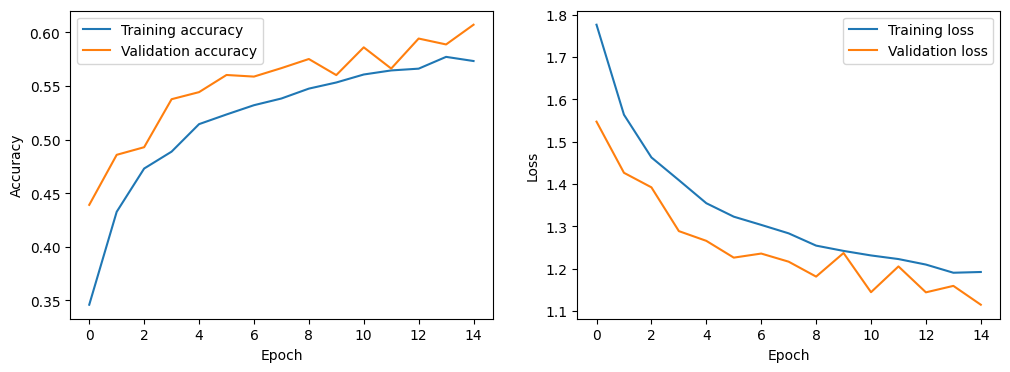

In [168]:
# Load model from the .h5 file we saved previously
model = load_model('complete_model_cnn.h5')

# Load the training history to generate plots without the need of re-training the model
with open('history_cnn.pkl', 'rb') as f:
    history_dict = pickle.load(f)


# Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc:.2%}")

# Visualize training merics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training loss')
plt.plot(history_dict['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


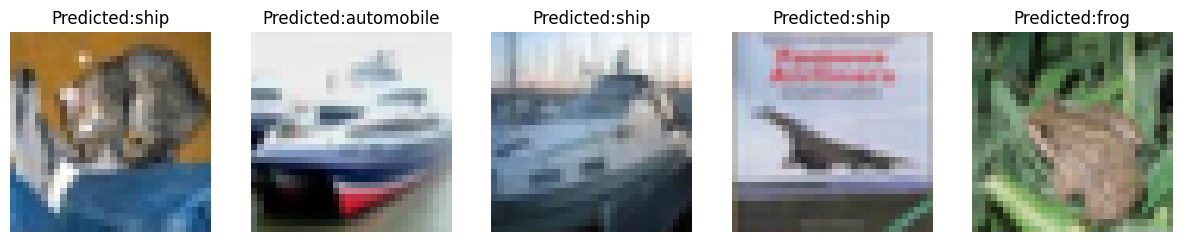

In [176]:
# Make predictions
predictions = model.predict(test_images)

# Display first 5 images with their true and predicted labels
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])  # Show image
    
    # Get the true label (from one-hot encoded test_labels)
    true_label_cnn = class_names[np.argmax(test_labels[i])]  # Convert one-hot encoded label to class index
    
    # Get the predicted label (from probability distribution in predictions)
    predicted_label_cnn = class_names[np.argmax(predictions[i])]  # Get the index of the max value
    
    # Display the true and predicted labels as the title
    plt.title(f"Predicted:{predicted_label_cnn}")
    
    # Hide the axis for better visualization
    plt.axis('off')

plt.show()


Filters shape: (3, 3, 3, 32)


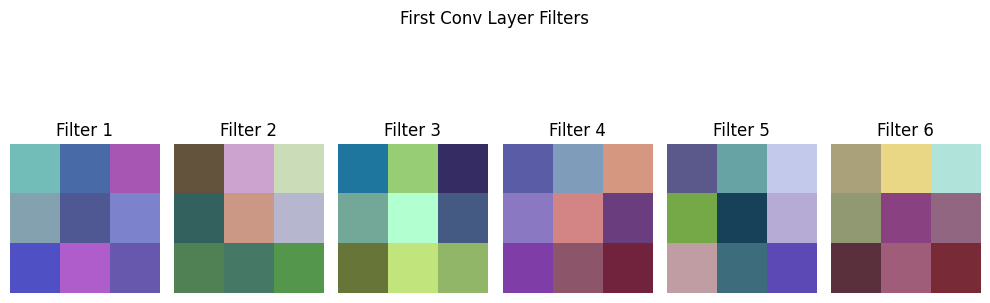

In [161]:
### Bonus: Visualize the filters

# Get the filters from the first conv layer
first_conv = model.get_layer('conv1')
filters, biases = first_conv.get_weights()

print(f"Filters shape: {filters.shape}")  # (3, 3, 3, 32)

# Normalize filter values to [0, 1] for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot the first 6 filters
n_filters = 6
plt.figure(figsize=(10, 4))
for i in range(n_filters):
    f = filters[:, :, :, i]
    plt.subplot(1, n_filters, i+1)
    plt.imshow(f)
    plt.title(f'Filter {i+1}')
    plt.axis('off')
plt.suptitle("First Conv Layer Filters")
plt.tight_layout()
plt.show()

# **Exercise 3: RNN** 
**Dataset:** IMDB (sentiment analysis) or time series.

**Task:**
* Preprocess the text (tokenization, padding).
* Build an RNN with an Embedding layer and an LSTM.
* Train the model and evaluate its performance with classification metrics.
* Bonus: Propose an architectural improvement (e.g., add Bidirectional LSTM).

In [149]:
# Load IMDB dataset (top 10,000 most frequent words)
vocab_size = 10000
maxlen = 200  # max words per review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)  # Load data

# Padding
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# RNN Model (LSTM)
model_rnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Configures the model for the training
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary() # Show table

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,412 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Train the model
history = model_rnn.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=2)


Epoch 1/5
313/313 - 28s - 90ms/step - accuracy: 0.7685 - loss: 0.4749 - val_accuracy: 0.8512 - val_loss: 0.3560
Epoch 2/5
313/313 - 25s - 79ms/step - accuracy: 0.8950 - loss: 0.2684 - val_accuracy: 0.8666 - val_loss: 0.3104
Epoch 3/5
313/313 - 25s - 79ms/step - accuracy: 0.9287 - loss: 0.1909 - val_accuracy: 0.8698 - val_loss: 0.3394
Epoch 4/5
313/313 - 26s - 83ms/step - accuracy: 0.9500 - loss: 0.1380 - val_accuracy: 0.8532 - val_loss: 0.3569
Epoch 5/5
313/313 - 28s - 88ms/step - accuracy: 0.9618 - loss: 0.1086 - val_accuracy: 0.8606 - val_loss: 0.3911


In [162]:
# Save the model
model_rnn.save('complete_model_imdb_rnn.h5')

# Save the history data for plotting later
with open('history_rnn_imbd.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
### Load model and history from saved files
rnn_model = load_model('complete_model_imdb_rnn.h5')

# Load training history
with open('history_rnn_imbd.pkl', 'rb') as f:
    rnn_history_dict = pickle.load(f)

# Evaluate model performance on test data
loss, acc = rnn_model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc:.2%}")

# Classification report
y_pred_probs = rnn_model.predict(x_test) 
y_pred = (y_pred_probs > 0.5).astype(int)
print(metrics.classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


Test Accuracy: 85.50%
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step
              precision    recall  f1-score   support

    Negative       0.84      0.88      0.86     12500
    Positive       0.88      0.83      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



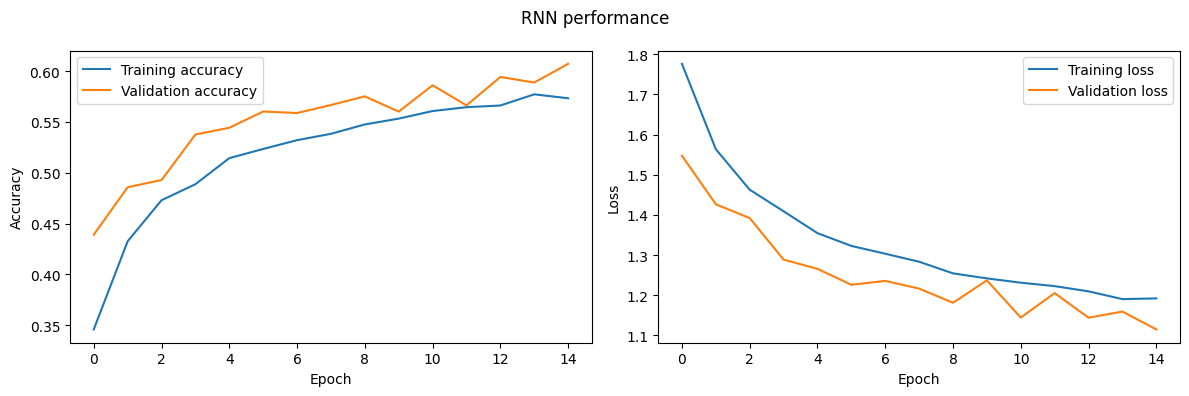

In [164]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
# Make two plots
plt.plot(rnn_history_dict['accuracy'], label='Training accuracy')
plt.plot(rnn_history_dict['val_accuracy'], label='Validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(rnn_history_dict['loss'], label='Training loss')
plt.plot(rnn_history_dict['val_loss'], label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.suptitle("RNN performance")
plt.tight_layout()
plt.show()

Description of the previous process
| Steps        | Description  |
|-------------|--------------|
| *Preprocess* | Tokenize and pad the IMDB reviews |
| *Model*     | Embedding layer + LSTM → Binary output |
| *Training*  | 5 epochs, 64 batch size, validation split |
| *Evaluation*| Accuracy + classification report |
| *Bonus**    | Swap LSTM for Bidirectional LSTM |

### Bidirectional LSTM

In [153]:
## Bonus: Propose a different model

# Define Bidirectional LSTM Model (improved architecture)
model_bidirectional = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen),
    Bidirectional(LSTM(64)),  # Bidirectional LSTM
    Dense(1, activation='sigmoid')
])

# Configures the model for the training
model_bidirectional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary() # Show table

c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,412 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Train the Bidirectional LSTM model
history_bidirectional = model_bidirectional.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/5
313/313 - 31s - 100ms/step - accuracy: 0.7809 - loss: 0.4557 - val_accuracy: 0.8246 - val_loss: 0.3977
Epoch 2/5
313/313 - 28s - 88ms/step - accuracy: 0.8957 - loss: 0.2657 - val_accuracy: 0.8708 - val_loss: 0.3073
Epoch 3/5
313/313 - 28s - 88ms/step - accuracy: 0.9277 - loss: 0.1951 - val_accuracy: 0.8372 - val_loss: 0.4322
Epoch 4/5
313/313 - 28s - 90ms/step - accuracy: 0.9459 - loss: 0.1514 - val_accuracy: 0.8640 - val_loss: 0.4126
Epoch 5/5
313/313 - 29s - 92ms/step - accuracy: 0.9607 - loss: 0.1125 - val_accuracy: 0.8640 - val_loss: 0.3967


In [169]:
# Save the trained model
model_bidirectional.save('complete_model_bidirectional_imbd.h5')

# Save the history of the model
with open('history_bidirectional_lstm.pkl', 'wb') as f:
    pickle.dump(history_bidirectional.history, f)

In [173]:
# Load the saved model
loaded_model_bidirectional = load_model('complete_model_bidirectional_imbd.h5')

# Load the saved history (for plotting)
with open('history_bidirectional_lstm.pkl', 'rb') as f:
    history_bidirectional_dict = pickle.load(f)


# Evaluate the model on test data
loss, acc = loaded_model_bidirectional.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {acc:.2%}")

# Classification report
y_pred_probs_bi = rnn_model.predict(x_test)  # Corrected here
y_pred_bi = (y_pred_probs_bi > 0.5).astype(int)
print(metrics.classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


Test accuracy: 85.60%
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step
              precision    recall  f1-score   support

    Negative       0.84      0.88      0.86     12500
    Positive       0.88      0.83      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



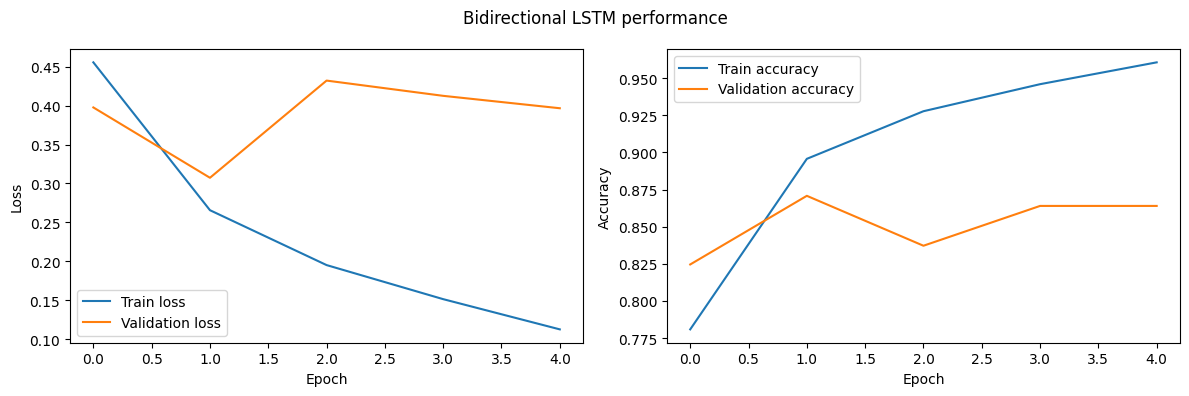

In [175]:
# Plot the training and validation loss
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history_bidirectional_dict['loss'], label='Train loss')
plt.plot(history_bidirectional_dict['val_loss'], label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_bidirectional_dict['accuracy'], label='Train accuracy')
plt.plot(history_bidirectional_dict['val_accuracy'], label='Validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.suptitle("Bidirectional LSTM performance")
plt.tight_layout()
plt.show()